In [76]:
## LTS Cluster Analysis:
## Use clustering algorithms to identify clusters of high-stress in the network.
## The clusters represent areas where there's a high level of traffic stress. 
# If you see many clusters close to each other or a large cluster, it indicates that particular region experiences high stress.
# import osmnx as ox
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import DBSCAN,OPTICS
# from sklearn.neighbors import NearestNeighbors
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# import matplotlib.cm as cm

# base_path = "/Users/leonardo/Desktop/Tesi/LTSBikePlan/images"
# city_name = "Trento"

# # Create the path for the new folder
# city_folder_path = os.path.join(base_path, city_name)

# # Create the folder if it doesn't exist
# if not os.path.exists(city_folder_path):
#     os.makedirs(city_folder_path)

# # Load data
# filepath = "/Users/leonardo/Desktop/Tesi/LTSBikePlan/data/Trento_lts.graphml"
# G_lts = ox.load_graphml(filepath)
# G_lts = ox.project_graph(G_lts, to_crs='EPSG:4326')
# crs = G_lts.graph['crs']

# def plot_k_distance_graph(features, k=2):
#     """Plot the k-distance graph."""
#     # Fit the Nearest Neighbors model
#     neigh = NearestNeighbors(n_neighbors=k)
#     nbrs = neigh.fit(features)
#     distances, _ = nbrs.kneighbors(features)
    
#     # Sort the distances
#     sorted_distances = np.sort(distances, axis=0)[:, 1]
    
#     # Setup the plot aesthetics
#     # sns.set_style('darkgrid')
#     plt.figure(figsize=(10, 6))
    
#     # Plot the k-distance graph
#     plt.plot(sorted_distances, lw=2)
#     plt.title('K-distance Graph', fontsize=16, fontweight='bold')
#     plt.xlabel('Points sorted according to distance of k-th nearest neighbor', fontsize=14)
#     plt.ylabel(f'Distance to {k}-th nearest neighbor', fontsize=14)
#     plt.tight_layout()
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#     plt.show()

# def cluster_nodes_by_stress(G):
#     """Cluster nodes based on stress."""
#     # Extract data
#     node_data = [
#         {'id': node, 'y': float(data['y']), 'x': float(data['x']), 'lts': int(data['lts'])} 
#         for node, data in G.nodes(data=True) if 'lts' in data and int(data["lts"]) == 4
#     ]
#     features = np.array([(data['y'], data['x']) for data in node_data])
    
#     # Determine eps using k-distance graph
#     plot_k_distance_graph(features)
    
#     eps = float(input("Based on the elbow in the plot, enter the value for eps: "))
    
#     # Setting min_samples
#     #D = features.shape[1]  # number of features, or dimensions
#     #cmin_samples = D + 1
#     #density_factor = 2  # this can be adjusted based on the desired density
#     #min_samples = base_min_samples * density_factor
#     min_samples = 15

#     # DBSCAN Clustering
#     db = DBSCAN(eps=eps, min_samples=min_samples).fit(features)
#     labels = db.labels_
    
#     # Add cluster labels back to nodes
#     for idx, data in enumerate(node_data):
#         node = data['id']
#         G.nodes[node]['cluster'] = labels[idx]
    
#     return G, labels, features


# def plot_clusters(G, save_path=None):

#     fig, ax = plt.subplots(figsize=(15,15))

#     # Set the background color of the figure and axis
#     fig.patch.set_facecolor('white')
#     ax.set_facecolor('white')
        
#     # Filter out nodes that don't have the 'cluster' attribute or are labeled as outliers (-1)
#     filtered_nodes = [node for node in G.nodes() if 'cluster' in G.nodes[node] and G.nodes[node]['cluster'] != -1]
    
#     # Get the 'cluster' attribute value for these nodes
#     clusters = [G.nodes[node]['cluster'] for node in filtered_nodes]
    
#     # Create a custom color map using a list of colors
#     custom_cmap = plt.cm.get_cmap('tab10', len(np.unique(clusters)))

#     # Map the cluster labels to the colors
#     node_colors = [custom_cmap(cluster) for cluster in clusters]
    
#     # Plot the subgraph of nodes with the 'cluster' attribute and aren't outliers
#     graph = G.subgraph(filtered_nodes)
#     ox.plot_graph(graph, node_color=node_colors, edge_linewidth=1.0, node_size=50, show=False, ax=ax)

#     plt.title('LTS Cluster Analysis')
#     if save_path:
#         plt.savefig(os.path.join(save_path, "lts_cluster.png"))
#     plt.show()


# # Use:
# cluster_nodes, labels, features = cluster_nodes_by_stress(G_lts)
# plot_clusters(cluster_nodes, save_path=city_folder_path)

# # Check noise labels exclusion:
# noise_proportion = (labels == -1).sum() / len(labels)
# print(noise_proportion)

# # Exclude noise labels before calculating silhouette score
# non_noise_indices = labels != -1

# # Compute silhouette score excluding noise points
# sil_score = silhouette_score(features[non_noise_indices], labels[non_noise_indices])
# db_score = davies_bouldin_score(features[non_noise_indices], labels[non_noise_indices])
# ch_score = calinski_harabasz_score(features[non_noise_indices], labels[non_noise_indices])
# print(f"Silhouette Score - DBSCAN: {sil_score}")
# print(f'Davies-Bouldin Index - DBSCAN: {db_score}')
# print(f'Calinski-Harabasz Score - DBSCAN: {ch_score}')

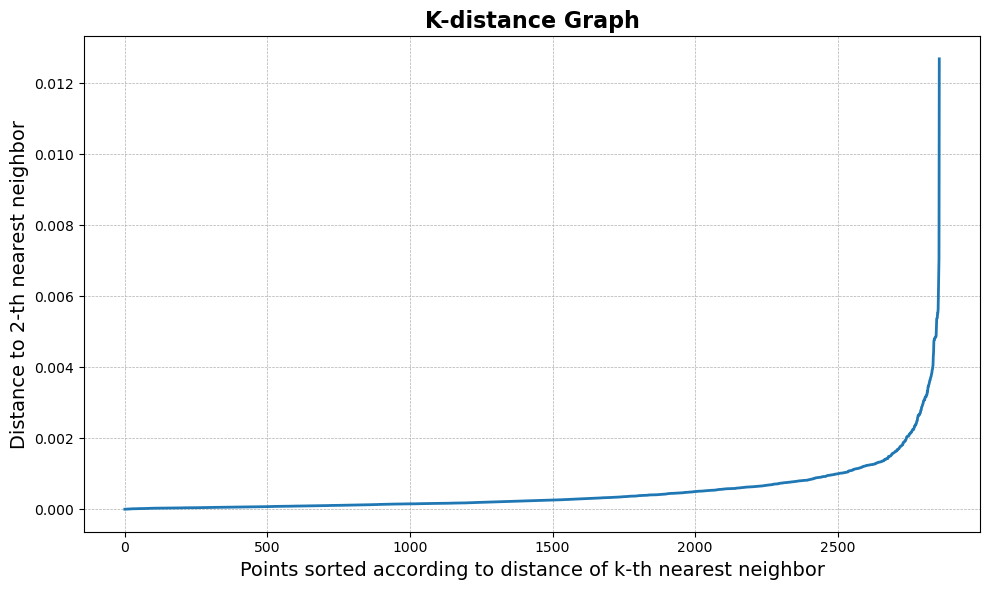

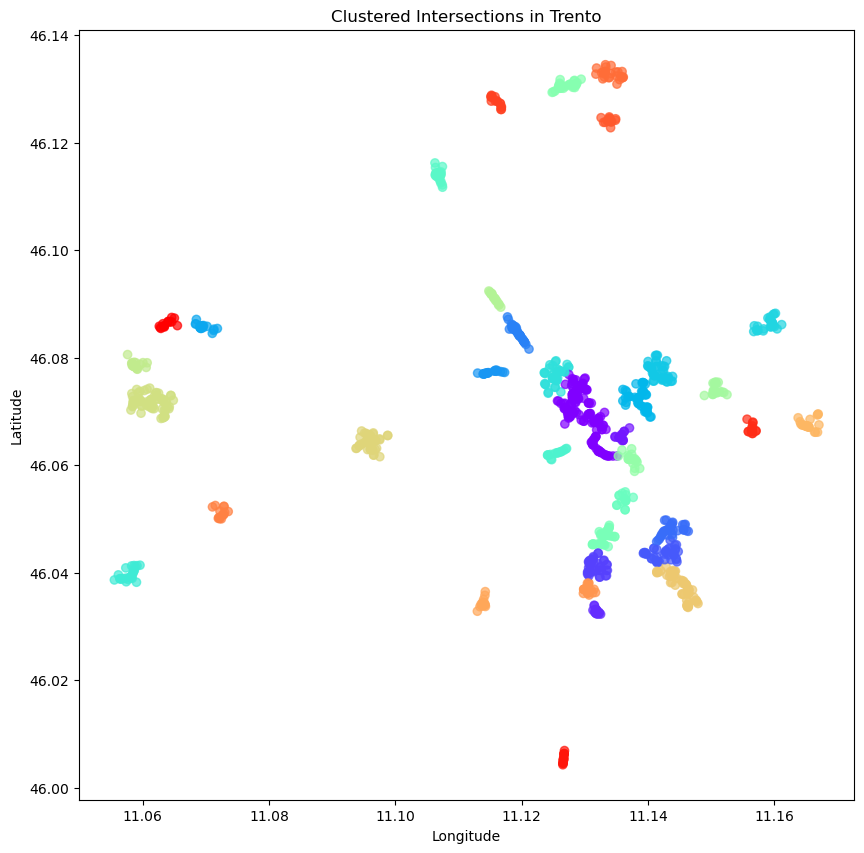

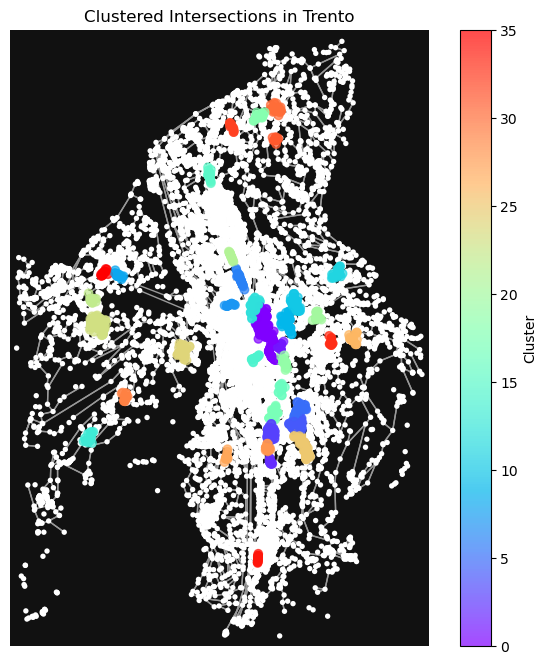

Silhouette Score: 0.6202660372176002
Davies-Bouldin Score: 0.37756726392428575
Calinski-Harabasz Score: 8799.216258023227


In [73]:
import osmnx as ox
import os
import numpy as np
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.cm as cm

## LTS Cluster Analysis:
## Use clustering algorithms to identify clusters of high-stress in the network.
## The clusters represent areas where there's a high level of traffic stress. 
# If you see many clusters close to each other or a large cluster, it indicates that particular region experiences high stress.

base_path = "/Users/leonardo/Desktop/Tesi/LTSBikePlan/images"
city_name = "Trento"

# Create the path for the new folder
city_folder_path = os.path.join(base_path, city_name)

# Create the folder if it doesn't exist
if not os.path.exists(city_folder_path):
    os.makedirs(city_folder_path)

# Load data
filepath = "/Users/leonardo/Desktop/Tesi/LTSBikePlan/data/Trento_lts.graphml"
G_lts = ox.load_graphml(filepath)
G_lts = ox.project_graph(G_lts, to_crs='EPSG:4326')
crs = G_lts.graph['crs']     

#DBSCAN case

node_data = [
        {'id': node, 'y': float(data['y']), 'x': float(data['x']), 'lts': int(data['lts'])} 
        for node, data in G_lts.nodes(data=True) if 'lts' in data and int(data['lts']) == 4
    ]

# Convert node data to DataFrame
node_df = pd.DataFrame(node_data)

# Create a GeoDataFrame for spatial operations
geometry = [Point(xy) for xy in zip(node_df.x, node_df.y)]
geo_df = GeoDataFrame(node_df, crs=crs, geometry=geometry)

# Function to plot k-distance graph
def plot_k_distance_graph(features, k=2):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(features)
    distances, _ = nbrs.kneighbors(features)
    sorted_distances = np.sort(distances, axis=0)[:, 1]
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_distances, lw=2)
    plt.title('K-distance Graph', fontsize=16, fontweight='bold')
    plt.xlabel('Points sorted according to distance of k-th nearest neighbor', fontsize=14)
    plt.ylabel(f'Distance to {k}-th nearest neighbor', fontsize=14)
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Feature matrix for clustering
X = geo_df[['x', 'y', 'lts']]  # Adjust features as needed

# Determine eps using k-distance graph
plot_k_distance_graph(X)

eps = float(input("Based on the elbow in the plot, enter the value for eps: "))
min_samples = 20

# Clustering (example using DBSCAN)
dbscan = DBSCAN(eps, min_samples=15)  # Adjust parameters as needed
geo_df['cluster'] = dbscan.fit_predict(X)
clustered_geo_df = geo_df[geo_df['cluster'] != -1]

# Visualization
plt.figure(figsize=(10, 10))
plt.scatter(clustered_geo_df['x'], clustered_geo_df['y'], c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "dbscan_lts_cluster.png"))
plt.show()

# Ensure the GeoDataFrame is in the same CRS as the OSMnx graph
clustered_geo_df = clustered_geo_df.to_crs(G_lts.graph['crs'])

# Create a figure and axis for the plot
fig, ax = ox.plot_graph(G_lts, show=False, close=False)

# Plot the clustered points
scatter = ax.scatter(clustered_geo_df['geometry'].x, clustered_geo_df['geometry'].y, 
                     c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)

# Optional: Add a color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Add titles and labels
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "dbscan_lts_cluster_geo.png"))
# Show the plot
plt.show()

# Ensure to exclude noise points (label -1) before computing the scores
filtered_labels = geo_df[geo_df['cluster'] != -1]['cluster']
filtered_features = geo_df[geo_df['cluster'] != -1][['x', 'y', 'lts']]

# Silhouette Score
if len(np.unique(filtered_labels)) > 1:  # Requires at least 2 clusters to compute
    silhouette = silhouette_score(filtered_features, filtered_labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")

# Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(filtered_features, filtered_labels)
print(f'Davies-Bouldin Score: {davies_bouldin}')

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(filtered_features, filtered_labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz}')


In [75]:
# #HDBSCAN cluster algorithm 

# import hdbscan

# def cluster_nodes_by_stress_hdbscan(G):
#     # Extract data
#     node_data = [
#         {'id': node, 'y': float(data['y']), 'x': float(data['x']), 'lts': int(data['lts'])} 
#         for node, data in G.nodes(data=True) if 'lts' in data and int(data['lts']) == 4
#     ]
#     features = np.array([(data['y'], data['x']) for data in node_data])

#     # Setting min_cluster_size for HDBSCAN
#     min_cluster_size = 4

#     # HDBSCAN Clustering
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
#     labels = clusterer.fit_predict(features)

#     # Add cluster labels back to nodes
#     for idx, data in enumerate(node_data):
#         node = data['id']
#         G.nodes[node]['cluster'] = labels[idx]
    
#     return G, labels, features

# def plot_clusters(G, save_path=None):
#     fig, ax = plt.subplots(figsize=(15,15))

#     # Set the background color of the figure and axis
#     fig.patch.set_facecolor('white')
#     ax.set_facecolor('white')
        
#     # Filter out nodes that don't have the 'cluster' attribute or are labeled as outliers (-1)
#     filtered_nodes = [node for node in G.nodes() if 'cluster' in G.nodes[node] and G.nodes[node]['cluster'] != -1]
    
#     # Get the 'cluster' attribute value for these nodes
#     clusters = [G.nodes[node]['cluster'] for node in filtered_nodes]
    
#     # Create a custom color map using a list of colors
#     custom_cmap = plt.cm.get_cmap('tab10', len(np.unique(clusters)))

#     # Map the cluster labels to the colors
#     node_colors = [custom_cmap(cluster) for cluster in clusters]
    
#     # Plot the subgraph of nodes with the 'cluster' attribute and aren't outliers
#     graph = G.subgraph(filtered_nodes)
#     ox.plot_graph(graph, node_color=node_colors, edge_linewidth=1.0, node_size=50, show=False, ax=ax)
#     plt.title('LTS HDBSCAN Cluster Analysis')
#     if save_path:
#         plt.savefig(os.path.join(save_path, "lts_hdbscan_cluster.png"))
#     plt.show()

# # Use:
# cluster_nodes, labels, features = cluster_nodes_by_stress_hdbscan(G_lts)
# plot_clusters(cluster_nodes, city_folder_path)

# # Check noise labels exclusion:
# noise_proportion = (labels == -1).sum() / len(labels)
# print(noise_proportion)

# # Exclude noise labels before calculating silhouette score
# non_noise_indices = labels != -1

# # Compute silhouette score excluding noise points
# sil_score = silhouette_score(features[non_noise_indices], labels[non_noise_indices])
# db_score = davies_bouldin_score(features[non_noise_indices], labels[non_noise_indices])
# ch_score = calinski_harabasz_score(features[non_noise_indices], labels[non_noise_indices])
# print(f"Silhouette Score - HDBSCAN: {sil_score}")
# print(f'Davies-Bouldin Index - HDBSCAN: {db_score}')
# print(f'Calinski-Harabasz Score - HDBSCAN: {ch_score}')

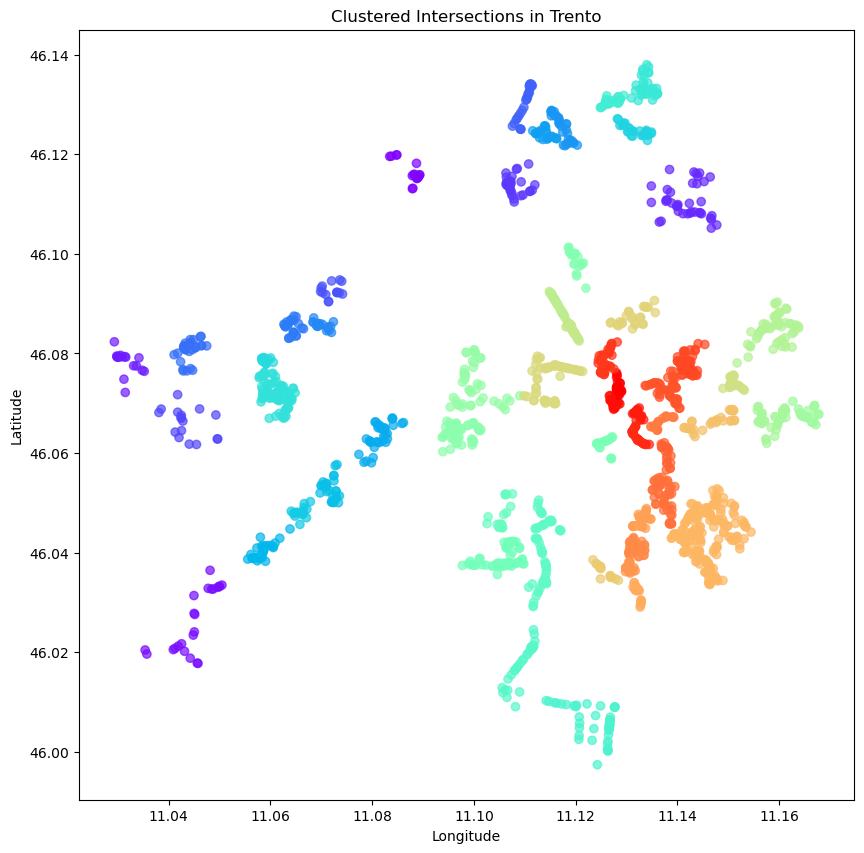

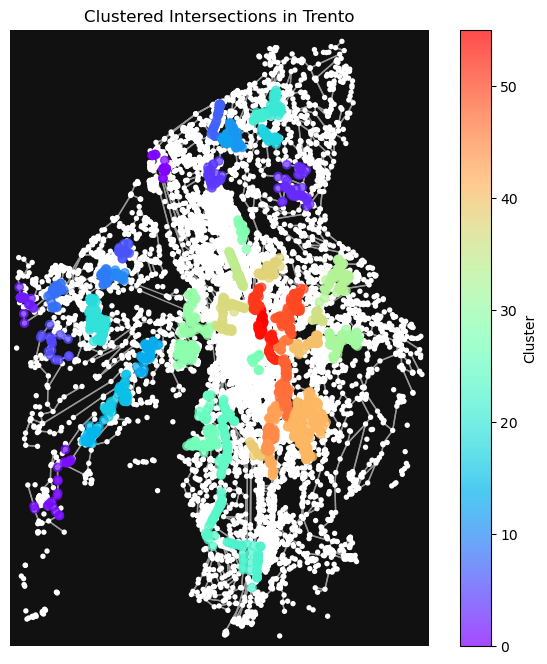

Silhouette Score: 0.545144133282076
Davies-Bouldin Score: 0.5462673658244604
Calinski-Harabasz Score: 5227.404337127424


In [74]:
# HDBSCAN case

# Convert node data to DataFrame
node_df = pd.DataFrame(node_data)

# Create a GeoDataFrame for spatial operations
geometry = [Point(xy) for xy in zip(node_df.x, node_df.y)]
geo_df = GeoDataFrame(node_df, crs=crs, geometry=geometry)

# Feature matrix for clustering
X = geo_df[['x', 'y', 'lts']] 

# Clustering using HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5)
geo_df['cluster'] = clusterer.fit_predict(X)
clustered_geo_df = geo_df[geo_df['cluster'] != -1]

# Visualization
plt.figure(figsize=(10, 10))
plt.scatter(clustered_geo_df['x'], clustered_geo_df['y'], c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "hdbscan_lts_cluster.png"))
plt.show()

# Ensure the GeoDataFrame is in the same CRS as the OSMnx graph
clustered_geo_df = clustered_geo_df.to_crs(G_lts.graph['crs'])

# Create a figure and axis for the plot
fig, ax = ox.plot_graph(G_lts, show=False, close=False)

# Plot the clustered points
scatter = ax.scatter(clustered_geo_df['geometry'].x, clustered_geo_df['geometry'].y, 
                     c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)

# Optional: Add a color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Add titles and labels
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "hdbscan_lts_cluster_geo.png"))
# Show the plot
plt.show()

# Ensure to exclude noise points (label -1) before computing the scores
filtered_labels = geo_df[geo_df['cluster'] != -1]['cluster']
filtered_features = geo_df[geo_df['cluster'] != -1][['x', 'y', 'lts']]

# Silhouette Score
if len(np.unique(filtered_labels)) > 1:  # Requires at least 2 clusters to compute
    silhouette = silhouette_score(filtered_features, filtered_labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")

# Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(filtered_features, filtered_labels)
print(f'Davies-Bouldin Score: {davies_bouldin}')

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(filtered_features, filtered_labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz}')




In [77]:
# def cluster_nodes_by_stress_optics(G):
#     # Extract data
#     node_data = [
#         {'id': node, 'y': float(data['y']), 'x': float(data['x']), 'lts': int(data['lts'])} 
#         for node, data in G.nodes(data=True) if 'lts' in data and int(data['lts']) == 4
#     ]
#     features = np.array([(data['y'], data['x']) for data in node_data])

#     # OPTICS Clustering
#     clusterer = OPTICS(min_samples=7) 
#     labels = clusterer.fit_predict(features)

#     # Add cluster labels back to nodes
#     for idx, data in enumerate(node_data):
#         node = data['id']
#         G.nodes[node]['cluster'] = labels[idx]
    
#     return G, labels, features

# def plot_clusters(G,save_path=None):
#     fig, ax = plt.subplots(figsize=(15,15))

#     # Set the background color of the figure and axis
#     fig.patch.set_facecolor('white')
#     ax.set_facecolor('white')
        
#     # Filter out nodes that don't have the 'cluster' attribute or are labeled as outliers (-1)
#     filtered_nodes = [node for node in G.nodes() if 'cluster' in G.nodes[node] and G.nodes[node]['cluster'] != -1]
    
#     # Get the 'cluster' attribute value for these nodes
#     clusters = [G.nodes[node]['cluster'] for node in filtered_nodes]
    
#     # Create a custom color map using a list of colors
#     custom_cmap = plt.cm.get_cmap('tab10', len(np.unique(clusters)))

#     # Map the cluster labels to the colors
#     node_colors = [custom_cmap(cluster) for cluster in clusters]
    
#     # Plot the subgraph of nodes with the 'cluster' attribute and aren't outliers
#     graph = G.subgraph(filtered_nodes)
#     ox.plot_graph(graph, node_color=node_colors, edge_linewidth=1.0, node_size=50, show=False, ax=ax)

#     plt.title('LTS Cluster Analysis')
#     if save_path:
#         plt.savefig(os.path.join(save_path, "lts_cluster_analysis_result.png"))
#     plt.show()

# # Use:
# cluster_nodes, labels, features = cluster_nodes_by_stress_optics(G_lts)
# plot_clusters(cluster_nodes, city_folder_path)

# # Check noise labels exclusion:
# noise_proportion = (labels == -1).sum() / len(labels)
# print(noise_proportion)

# # Exclude noise labels before calculating silhouette score
# non_noise_indices = labels != -1

# # Compute silhouette score excluding noise points
# sil_score = silhouette_score(features[non_noise_indices], labels[non_noise_indices])
# db_score = davies_bouldin_score(features[non_noise_indices], labels[non_noise_indices])
# ch_score = calinski_harabasz_score(features[non_noise_indices], labels[non_noise_indices])
# print(f"Silhouette Score: {sil_score}")
# print(f'Davies-Bouldin Index: {db_score}')
# print(f'Calinski-Harabasz Score: {ch_score}')

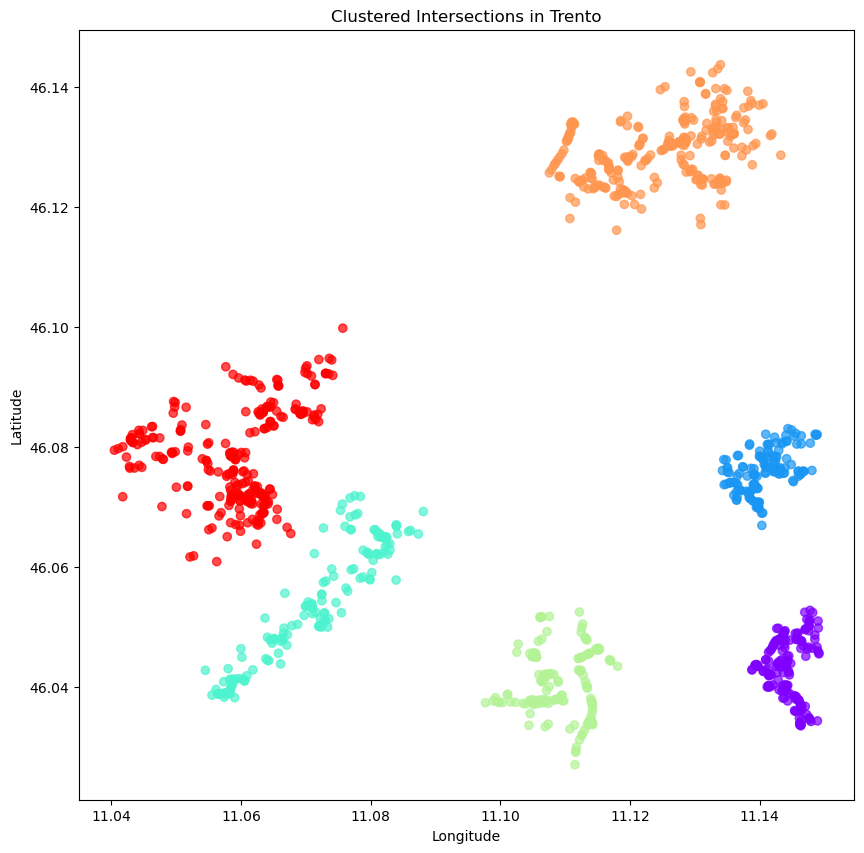

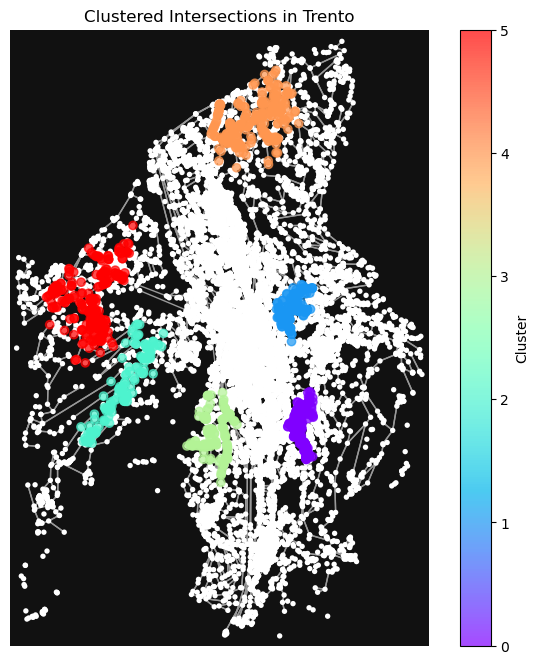

Silhouette Score: 0.6821357775438164
Davies-Bouldin Score: 0.4831841191754513
Calinski-Harabasz Score: 5451.082936605668


In [78]:
# Convert node data to DataFrame
node_df = pd.DataFrame(node_data)

# Create a GeoDataFrame for spatial operations
geometry = [Point(xy) for xy in zip(node_df.x, node_df.y)]
geo_df = GeoDataFrame(node_df, crs=crs, geometry=geometry)

# Feature matrix for clustering
X = geo_df[['x', 'y', 'lts']]  # Adjust features as needed

# Clustering using OPTICS
optics_clusterer = OPTICS(min_samples=15, xi=0.05, min_cluster_size=0.05)  # Adjust parameters as needed
geo_df['cluster'] = optics_clusterer.fit_predict(X)
clustered_geo_df = geo_df[geo_df['cluster'] != -1]

# Visualization
plt.figure(figsize=(10, 10))
plt.scatter(clustered_geo_df['x'], clustered_geo_df['y'], c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "optics_lts_cluster.png"))
plt.show()

# Ensure the GeoDataFrame is in the same CRS as the OSMnx graph
clustered_geo_df = clustered_geo_df.to_crs(G_lts.graph['crs'])

# Create a figure and axis for the plot
fig, ax = ox.plot_graph(G_lts, show=False, close=False)

# Plot the clustered points
scatter = ax.scatter(clustered_geo_df['geometry'].x, clustered_geo_df['geometry'].y, 
                     c=clustered_geo_df['cluster'], cmap=cm.rainbow, alpha=0.7)

# Optional: Add a color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Add titles and labels
plt.title(f'Clustered Intersections in {city_name}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(os.path.join(city_folder_path, "optics_lts_cluster_geo.png"))
# Show the plot
plt.show()

# Ensure to exclude noise points (label -1) before computing the scores
filtered_labels = geo_df[geo_df['cluster'] != -1]['cluster']
filtered_features = geo_df[geo_df['cluster'] != -1][['x', 'y', 'lts']]

# Silhouette Score
if len(np.unique(filtered_labels)) > 1:  # Requires at least 2 clusters to compute
    silhouette = silhouette_score(filtered_features, filtered_labels)
    print(f'Silhouette Score: {silhouette}')
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")

# Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(filtered_features, filtered_labels)
print(f'Davies-Bouldin Score: {davies_bouldin}')

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(filtered_features, filtered_labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
